In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from vbi.models.cpp.km import KM_sde
from helpers import *
import tqdm
from multiprocessing import Pool
# from vbi.feature_extraction.features import 

In [2]:
seed = 2
np.random.seed(seed)

In [3]:
LABESSIZE = 14
plt.rcParams['axes.labelsize'] = LABESSIZE
plt.rcParams['xtick.labelsize'] = LABESSIZE
plt.rcParams['ytick.labelsize'] = LABESSIZE

In [4]:
nn = 6
SC = nx.to_numpy_array(nx.complete_graph(nn), dtype=np.float64)

In [5]:
par_dict = {
    "G": 0.01,
    "noise_amp": 0.05,
    "dt": 0.01,     # [s]
    "omega": 2 * np.pi* np.random.normal(0.1, 0.5, nn),
    "weights": SC,
    "t_transition": 500.0,      # ms
    "t_end": 2001.0,            # ms
    "alpha": None,
    "output": "output",
}

In [6]:
obj = KM_sde(par_dict)
print(obj())
data = obj.run()

{'G': 0.01, 'dt': 0.01, 'noise_amp': 0.05, 'weights': array([[0., 1., 1., 1., 1., 1.],
       [1., 0., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 0.]]), 'alpha': None, 'omega': array([-0.68096486,  0.45155108, -6.08273943,  5.78138125, -5.00592553,
       -2.01610881]), 'noise_seed': 0, 'seed': None, 't_initial': 0.0, 't_transition': 500.0, 't_end': 2001.0, 'num_threads': 1, 'output': 'output', 'initial_state': None, 'type': <class 'numpy.float32'>}


fmax = 0.0732421875 Hz, Pxx = 1.5414425134658813


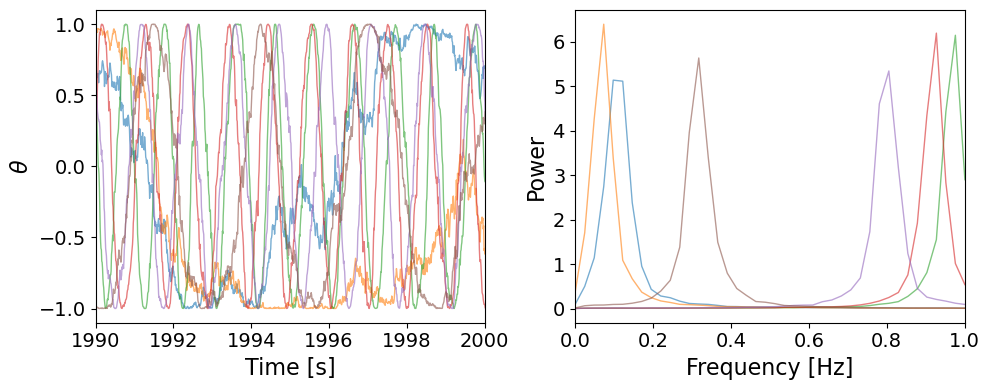

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plot_ts_pxx_km(data, par_dict, [ax[0], ax[1]], alpha=0.6, lw=1)
ax[0].set_xlim(1990, 2000)
plt.tight_layout()
plt.show()

################## Sweep G ####################

In [8]:
def kop(ts):
    nn, nt = ts.shape
    r = np.abs(np.sum(np.exp(1j * ts), axis=0) / nn)
    return r

In [9]:
def run(g):
    par = deepcopy(par_dict)
    par['G'] = g
    obj = KM_sde(par)
    data = obj.run()
    r = np.mean(kop(data['x']))
    return r

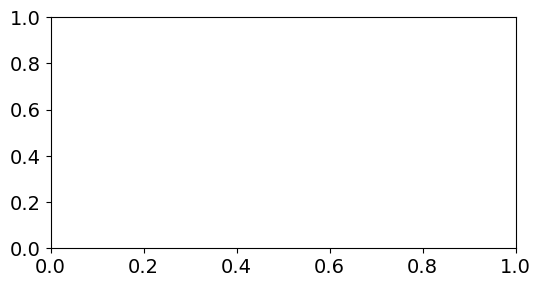

In [10]:
K = np.arange(0, 3, 0.1)
R = np.zeros(len(K))
fig, ax = plt.subplots(1, figsize=(6,3))

In [11]:
with Pool(10) as p:
    R = np.array(list(tqdm.tqdm(p.imap(run, K), total=len(K))))

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:10<00:00,  2.77it/s]


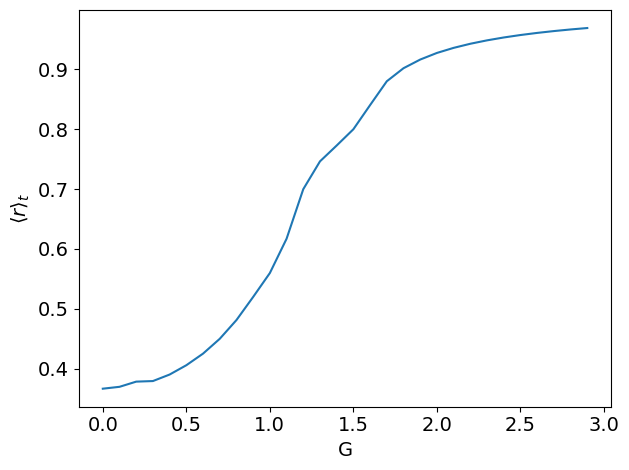

In [12]:
plt.plot(K, R)
plt.xlabel("G")
plt.ylabel(r"$\langle r \rangle_{t}$")
plt.tight_layout()
plt.show()